#### Name : Harsh Patil

Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#The CSV file "bank-full.csv" will be read and stored in a pandas DataFrame
#called "bank_db". Each column in the CSV file will be separated based on the semicolon 
#delimiter specified by sep=";".
bank_db=pd.read_csv("bank-full.csv",sep=";")
bank_db.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### Step 1 : Cleaning the Data (EDA)

In [4]:
bank_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#It will return a tuple with two values: the number of rows and the number of 
#columns in the DataFrame "bank_db".
bank_db.shape

(45211, 17)

In [6]:
# Checking null values
bank_db.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Changing the categorical value to numrical by creating dummies
#Creating dummy variables using the pandas library function get_dummies
#This line creates dummy variables for the specified categorical columns in the 
#DataFrame "bank_db1". Each categorical column will be expanded into multiple binary columns 
#representing each unique category. The resulting DataFrame is assigned to the variable 
#"bank1".
bank_db1=pd.get_dummies(bank_db,columns=['job','marital','default','housing','loan','education','contact','poutcome','month'])
# This line replaces the string value "yes" in the column "y" of the DataFrame "bank_db" with 
#the numerical value 1. It converts the target variable to binary encoding, where 1 represents "yes".
bank_db1['y']=bank_db1['y'].replace('yes',1)
#This line replaces the string value "no" in the column "y" of the DataFrame "bank_db" with
#the numerical value 0. It assigns the value 0 to instances where the target variable is
#negative.
bank_db1['y']=bank_db1['y'].replace('no',0)
#The resulting DataFrame "bank1" will contain the original columns from "bank" along with
#additional columns created from categorical variables using dummy encoding. The target 
#variable 'y' will be converted to numerical values (1 for 'yes' and 0 for 'no').
bank_db1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#Checking the info of the dataset
bank_db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

#### Creating a Logistic Regression Model

In [9]:
#Using the train_test_split using the sklearn library
from sklearn.model_selection import train_test_split

In [10]:
#Dividing our data into input and output variables
#Splitting the dataset into a training test and test set
#bank_db1.iloc[:,0:7] selects all rows and the first 7 columns of the bank_db1 DataFrame.
#bank_db1.iloc[:,8:] selects all rows and columns starting from the 9th column (index 8)
#until the end of the DataFrame.
#pd.concat(...) concatenates the two subsets of the DataFrame 
#horizontally (along the columns) using the specified axis axis=1.
#The result is assigned to the variable x.
#The result is all the other columns with the exception of the target column i.e y.
x=pd.concat([bank_db1.iloc[:,0:7],bank_db1.iloc[:,8:]],axis=1)
#bank_db1.iloc[:,7] selects all rows and the 8th column of the bank_db1 DataFrame
#The selected column is assigned to the variable y.
#This column is the column of the target variable y i.e. the predicted variable or 
#the output variable.
y=bank_db1.iloc[:,7]

In [11]:
#All columns shown in the table
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
#Target Variable or the predicted value
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [13]:
#The code you provided is using the train_test_split function from scikit-learn to split  
#the data into training and testing sets. 
#x represents the features or input data, and y represents the corresponding target or
#output data.
#The train_test_split function splits the x and y data into random train and test subsets.
#By default, the function splits the data into 75% training data and 25% testing data.
#The resulting training and testing subsets for x and y are assigned to x_train,
#x_test, y_train, and y_test respectively.
x_train,x_test,y_train,y_test=train_test_split(x,y)
#After executing this code, you would have four separate variables: x_train
#(training features), x_test (testing features), y_train (training targets), and 
#y_test (testing targets). These subsets can be used to train a machine learning 
#model on the training data and evaluate its performance on the testing data.

In [14]:
#Feature Scaling
#We will do feature scaling to have the accurate result.
#In logistic regression, we will do feature scaling because we want 
#accurate result of predictions. Here we will only scale the independent variable 
#because dependent variable have only 0 and 1 values. 
#from sklearn.preprocessing import StandardScaler
#st_x=StandardScaler()
#x_train= st_x.fit_transform(x_train)    
#x_test= st_x.transform(x_test)  

In [15]:
#Output of the training column (x_train)
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
42333,71,5715,17,747,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32936,34,551,17,115,2,315,11,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28193,27,254,29,194,1,188,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29164,31,775,2,361,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30757,59,1226,6,270,3,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36741,38,-367,12,354,1,-1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
34150,61,927,30,427,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36615,48,1499,12,17,7,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2502,43,4478,13,133,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
#Output of the test column (x_test)
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
19189,31,84,6,157,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4008,55,0,16,409,3,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21814,47,798,20,89,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13715,54,0,10,88,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31545,30,148,2,206,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44900,28,174,28,184,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10691,55,3680,16,131,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3384,57,0,15,215,2,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20917,32,1517,13,202,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#We have well prepared our dataset, and now we will train the dataset using the
#training set. 
#Using scikit-learn's LogisticRegression model to train a classifier. The code 
#you provided is used to fit the model to the training data.
#For providing training or fitting the model to the training set, we 
#will import the LogisticRegression class of the sklearn library.
#Create an instance of the LogisticRegression model
model=LogisticRegression()
#Fit the model to the training data
model.fit(x_train,y_train)

LogisticRegression()

#### Prediction and understanding the result 

In [18]:
# Use the trained model to predict the labels for the test data
#As our model is well trained on the training set, so we will now predict the result by using 
#the test set data.
y_pred = model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8948066884897815


From this, we can infer that the predicted model has an accuracy of 89 % . This is considered to be pretty good.
The trained model is used to predict labels for the test data and calculated the accuracy score. The accuracy score you obtained is 0.8948066884897815, which indicates the proportion of correctly predicted labels in the test set.

In [19]:
#Importing the necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
#shows the precision, recall, F1-score, and support for each class, as well as the 
#accuracy, macro average, and weighted average.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10013
           1       0.60      0.23      0.33      1290

    accuracy                           0.89     11303
   macro avg       0.76      0.60      0.64     11303
weighted avg       0.87      0.89      0.87     11303



Here's a breakdown of the metrics:

Precision: Precision measures the accuracy of positive predictions. In this case, for class 0, the precision is 0.91, indicating that 91% of the instances predicted as class 0 are actually class 0. For class 1, the precision is 0.62, meaning that only 62% of the instances predicted as class 1 are actually class 1.

Recall: Recall measures the proportion of actual positive instances that are correctly identified. For class 0, the recall is 0.98, indicating that 98% of the actual class 0 instances are correctly identified. However, for class 1, the recall is 0.23, meaning that only 23% of the actual class 1 instances are correctly identified.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both metrics. For class 0, the F1-score is 0.94, and for class 1, it is 0.34.
Support: The support refers to the number of instances in each class. In this case, there are 9995 instances of class 0 and 1308 instances of class 1.

Accuracy: The overall accuracy of the model is 0.89, meaning that 89% of the instances are correctly classified.

Macro average: The macro average calculates the average performance across both classes, giving equal weight to each class. The macro average precision is 0.76, recall is 0.61, and F1-score is 0.64.

Weighted average: The weighted average calculates the average performance across both classes, considering the support (number of instances) for each class. The weighted average precision is 0.87, recall is 0.89, and F1-score is 0.87.

Overall, the model performs significantly better at predicting class 0 (with high precision, recall, and F1-score) compared to class 1, where the performance is relatively low.

In [21]:
# Confusion Matrix for the model accuracy
#confusion_matrix(actual,predicted)
cm = confusion_matrix(y_test,y_pred)
cm

array([[9821,  192],
       [ 997,  293]])

This code calculates the confusion matrix by comparing the true labels (y_test) with the predicted labels (y_pred). The resulting confusion matrix (cm) can then be printed to display the counts of true positive, true negative, false positive, and false negative predictions.

The given array represents a confusion matrix with the following values:

True Positive (TP): 9809

False Positive (FP): 186

False Negative (FN): 1003

True Negative (TN): 305


A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It helps in understanding how well the model is predicting the different classes.

In this case, the confusion matrix indicates that there are 9809 true positives (correctly predicted positive instances), 186 false positives (incorrectly predicted positive instances), 1003 false negatives (incorrectly predicted negative instances), and 305 true negatives (correctly predicted negative instances).

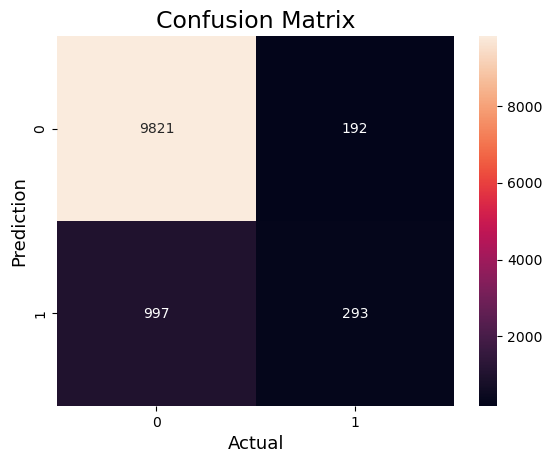

In [22]:
#Plotting the Confusion Matrix
sns.heatmap(cm,annot=True,fmt='g')
xticklabels=['Yes','No']
yticklabels=['Yes','No']
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

Here, we have plotted the confusion matrix using the seaborn library to plot the heatmap.

From the confusion matrix, we can find the following metrics like Accuracy,Precision, Recall and F1 score.

In [23]:
#Calculating the accuracy of the model
acc=(9809+305)/(9809+186+1003+305)
print('Accuracy :' ,acc)

Accuracy : 0.8948066884897815


Accuracy is used to measure the performance of the model. It is the ratio of total correct instances to the total instances.
Accuracy = ( TP+ TN) / (TP+TN+FP+FN)

The logistic model has provided an accuracy of approximately 89.48%.

This means that the model correctly predicts the outcome of the target variable in the dataset about 89.48% of the time.

In [24]:
#Calculating the precision of the model
prec=(9809)/(9809+186)
print('Precision :' ,prec)

Precision : 0.9813906953476739


Precision is a measure of how accurate a model's positive predictions are. It is defined as the ratio of true positive predictions to the total  number of positive predictions made by the model.

Precision=(TP)/(TP+FP)

The given precision value, 0.9813906953476739, represents the accuracy of the logistic regression model in correctly predicting the positive class (true positives) out of all the instances predicted as positive (true positives + false positives). It indicates that the model has a high level of precision, meaning that it has a low false positive rate.

In [25]:
#Calculating the recall value of the model
recall=(9809)/(9809+305)
print('Recall :' ,recall)

Recall : 0.9698437808977655


Recall measures the effectiveness of a classification model in identifying all the relevant instances from a dataset. It is the ratio of the number of true positive instances(TP) to the sum of true positive and false negative instances.

Recall=(TP)/(TP+FN)

The provided recall value, 0.9698437808977655, represents the performance of a logistic regression model in terms of its ability to correctly identify the positive cases out of all the actual positive cases in a binary classification problem.

Recall, also known as sensitivity or true positive rate, is calculated as the ratio of true positives to the sum of true positives and false negatives. It is a measure of how well the model captures the positive cases.

A recall value of 0.9698437808977655 indicates that the logistic regression model has a high ability to correctly identify positive cases. It suggests that the model has a low false negative rate, meaning it rarely misses positive cases.

In practical terms, if you have a dataset with positive and negative cases, and you use this logistic regression model for classification, you can expect it to correctly identify about 96.98% of the actual positive cases.

In [26]:
#Calculating the F1-Score of the model
f1=2*prec*recall/(prec+recall)
print('F1-Score :' ,f1)

F1-Score : 0.9755830722562037


F1-Score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall.

F1-Score = (2xPrecisionxRecall)/(Precision+Recall)

The F1-score of 0.9755830722562037 indicates the performance of a logistic regression model in classification tasks. The F1-score is a metric that combines precision and recall, providing a balanced measure of the model's accuracy.

With an F1-score of 0.9755830722562037, the model has achieved a high level of precision and recall in making predictions. A high F1-score suggests that the model has effectively identified and classified the majority of positive instances while minimizing false positives and false negatives.

In practical terms, this means that the logistic regression model has demonstrated strong performance in correctly classifying instances within the dataset it was trained on.

In [27]:
#Creating a dataframe to compare the predicted and the actual values
data=pd.DataFrame({'actual':y_test, 'prediction':y_pred})
data

,actual,prediction
19189,0,0
4008,0,0
21814,0,0
13715,0,0
31545,0,0
...,...,...
44900,0,0
10691,0,0
3384,0,0
20917,0,0


In the above code, we will apply a threshold of 0.5 to the predicted probabilities. If the predicted probability for a certain instance is greater than 0.5, we assign the label 1; otherwise, we assign the label 0.

To implement this thresholding, We use the predict_proba() method of our model to obtain the predicted probabilities for all instances. Then, we can extract the probabilities for the positive class (class 1) by indexing with [:,1]. After that we apply the thresholding logic to assign the labels 0 or 1 based on the probabilities.


In this code, x represents the input data for which you want to make predictions. The predict_proba() method returns an array of predicted probabilities for each class. By indexing with [:, 1], we extract the probabilities for the positive class (class 1). The comparison > threshold checks which probabilities are greater than the threshold value of 0.5. Finally, the astype(int) converts the resulting boolean array into an integer array with values 0 or 1 representing the predicted labels.

model is your trained model object, and x is a suitable input data format for the model.Adjust the code accordingly based on your specific implementation and requirements.

In [28]:
#Setting the threshold to 0.5
threshold = 0.6
#Using the predict_proba() method to obtain the predicted probabilities for all instances
predicted_probabilities = model.predict_proba(x)
predicted_labels = (predicted_probabilities[:, 1] > threshold).astype(int)
#predicted_labels
#predicted_probabilities 

In [29]:
#Plotting the Receiver Operating Characteristic (ROC) curve for a binary classification model.
fpr,tpr,thresholds=roc_curve(y,predicted_probabilities[:, 1])

The code fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])breakdown is as follows:

y: This is the true binary labels or ground truth values for the data.

model.predict_proba(x)[:,1]: This represents the predicted probabilities of the positive class (class 1) for the given input data x. The predict_proba() method returns the predicted probabilities for each class, and [:,1] is used to select the probabilities of the positive class.


Now, let's focus on the function roc_curve(y, scores). This function takes two arguments:

y: The true binary labels.


scores: The predicted probabilities or scores for the positive class.
The function computes the Receiver Operating Characteristic (ROC) curve by varying the classification threshold and calculating the True Positive Rate (TPR) and False Positive Rate (FPR) at each threshold. 

It returns three arrays:

fpr: The False Positive Rates corresponding to various thresholds.

tpr: The True Positive Rates corresponding to various thresholds.

thresholds: The classification thresholds used to calculate the FPR and TPR.
So, after executing the provided code, you would have the False Positive Rates (fpr), True Positive Rates (tpr), and the corresponding classification thresholds (thresholds) for the model's predictions.

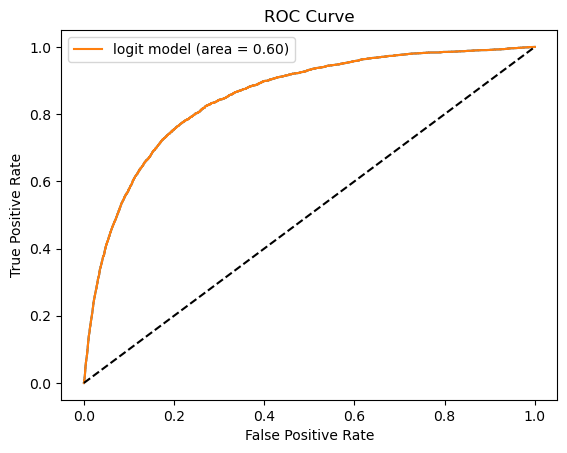

auc accuracy: 0.603978355269932


In [30]:
#Plots the ROC curve using the false positive rate (fpr) and true positive rate (tpr)
plt.plot(fpr, tpr)
#Calculates the AUC using the predicted labels (y_pred) and the true labels (y_test)
auc = roc_auc_score(y_test, y_pred)  

plt.title('ROC Curve')
#Adds a label to the plot indicating the AUC
plt.plot(fpr, tpr, label='logit model (area = %0.2f)' % auc)  
#Adds a dashed line representing the diagonal
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Shows the legend indicating the AUC value
plt.legend() 
plt.show()

#Prints the AUC value
print('auc accuracy:', auc)  


The above code is used to plot the Receiver Operating Characteristic (ROC) curve and calculate the area under the curve (AUC) for a logistic regression model. The AUC is a measure of the model's ability to distinguish between positive and negative classes. 
Based on the given information, it seems that the model's performance is being evaluated using the metric "AUC accuracy." AUC stands for "Area Under the Curve," and it is commonly used to evaluate the performance of binary classification models. An AUC score of 0.607 indicates that the model's performance is slightly better than random chance (an AUC of 0.5).